This Notebook demonstrates the use of Neural Network to approximate the solution from its differential equation.

EQUATION : dy/dx + y = 0

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing Pytorch

In [7]:
import torch
import torch.nn as nn

Creating the Neural Netwrok

In [9]:
class MyNN(nn.Module):
    def __init__(self):
        super(MyNN, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(1, 32),
            nn.Tanh(),
            nn.Linear(32, 32),
            nn.Tanh(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return 1 + self.network(x)  #HERE THE ONE ADDED REPRESENTS THE INITIAL CONDITION WHEN X = 0, Y = 1

Defining an Loss Function which penalizes the model when its output deviate from 0.

In [11]:
def loss_funn(model, x):
    y = model(x)
    dy_dt = torch.autograd.grad(y, x, torch.ones_like(y), create_graph = True)[0]
    return torch.mean((dy_dt + y) ** 2)   #dy/dx + y = 0

Defining the training sequence.

In [13]:
def train(model, optimizer, epochs = 1000):
    x = torch.linspace(0, 10, 100).unsqueeze(1).requires_grad_(True)
    for epoch in range(epochs):
        optimizer.zero_grad()
        loss = loss_funn(model, x)
        loss.backward()
        optimizer.step()

        print(f"Epochs : {epoch + 1}\tLoss : {loss.item()}\n")

    return x, model(x).detach().numpy()

In [14]:
model = MyNN()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [15]:
x, y_pred = train(model, optimizer)

Epochs : 1	Loss : 1.1240880489349365

Epochs : 2	Loss : 0.9327211976051331

Epochs : 3	Loss : 0.7603273987770081

Epochs : 4	Loss : 0.6072429418563843

Epochs : 5	Loss : 0.473560631275177

Epochs : 6	Loss : 0.3591644763946533

Epochs : 7	Loss : 0.26369956135749817

Epochs : 8	Loss : 0.18652664124965668

Epochs : 9	Loss : 0.1266898214817047

Epochs : 10	Loss : 0.08290039002895355

Epochs : 11	Loss : 0.05353669077157974

Epochs : 12	Loss : 0.03666556999087334

Epochs : 13	Loss : 0.03009128011763096

Epochs : 14	Loss : 0.03143687918782234

Epochs : 15	Loss : 0.03826048970222473

Epochs : 16	Loss : 0.0482020229101181

Epochs : 17	Loss : 0.05914340540766716

Epochs : 18	Loss : 0.06934908032417297

Epochs : 19	Loss : 0.07755386084318161

Epochs : 20	Loss : 0.08298179507255554

Epochs : 21	Loss : 0.0853063091635704

Epochs : 22	Loss : 0.08457347750663757

Epochs : 23	Loss : 0.08110897243022919

Epochs : 24	Loss : 0.0754251778125763

Epochs : 25	Loss : 0.06813616305589676

Epochs : 26	Loss : 0

PLOTTING THE INPUT 'X' AND PREDICTED 'Y'

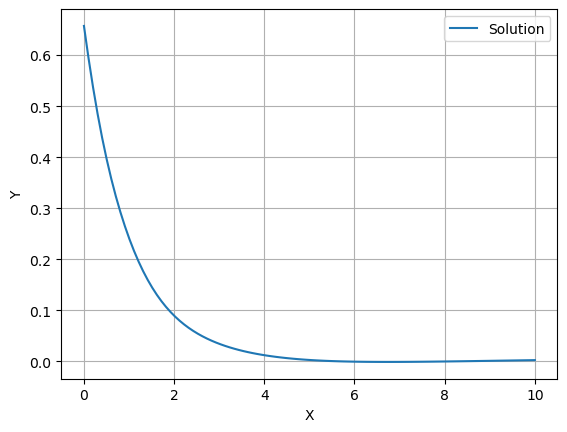

In [32]:
plt.plot(x.detach().numpy(), y_pred, label = 'Solution')
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
